In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
# from tensorflow.keras.optimiziers import Adam
# import tensorflow as tf
# from tensorflow import keras
# from keras.layers.convolutional import Conv2D

In [2]:
face_cascade = cv2.CascadeClassifier('/Users/mac/Downloads/ML Project/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/mac/Downloads/ML Project/haarcascade_eye.xml')

In [3]:

#creating a function that returns all of the cropped images


def single_face(d):
    
    
    images = []
    for filename in os.listdir(d):
        img = cv2.imread(os.path.join(d,filename))
        if img is not None:
            images.append(img)
    
    
    face_list = []
    for i in images:
        faces = face_cascade.detectMultiScale(i)
        face_list.append(faces)
    
    
    
    
    
    
    coordinate_list = []      #list of the face coordinates
    index = []      #list of all of the indices
    for i in range(len(face_list)):
        if len(face_list[i]) == 1: #all those images in which the face has been detected
            coordinate_list.append(face_list[i])
            index.append(i)
        else:
            pass
        
        
        
        
    img_2 = []
    for j in index:
        img_2.append(images[j])    
        
    rect = []
    for i in range(len(coordinate_list)):
        for x,y,w,h in coordinate_list[i]:
            rect.append(img_2[i][y:y+h, x:x+w])
            
    return rect

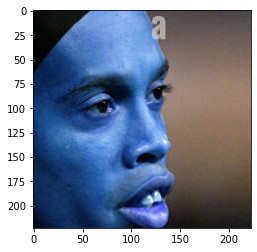

In [4]:
ronaldinho = '/Users/mac/Downloads/ML Project1/ronaldinho'
ronaldinho_face = single_face(ronaldinho)


plt.imshow(ronaldinho_face[5])

In [5]:
#os.mkdir(ronaldinho+'/cropped')


ronaldinho_direct = []
for i in range(len(ronaldinho_face)):
    d3 = ronaldinho + '/cropped' + '/ronaldinho_' + str(i) + '.jpg'
    ronaldinho_direct.append(d3)

In [6]:
for i in range(len(ronaldinho_direct)):
    cv2.imwrite(ronaldinho_direct[i], ronaldinho_face[i])

# ELON MUSK

In [7]:
elon = '/Users/mac/Downloads/ML Project1/elon musk'
elon_face = single_face(elon)

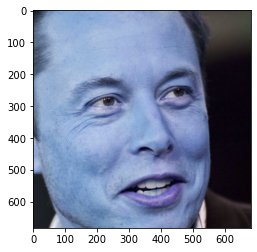

In [8]:
plt.imshow(elon_face[0])

In [9]:
#os.mkdir(elon+'/cropped')
elon_direct = []
for i in range(len(ronaldinho_face)):
    d2 = elon + '/cropped' + '/elon_' + str(i) + '.jpg'
    elon_direct.append(d2)

In [10]:
for i in range(len(elon_direct)):
    cv2.imwrite(elon_direct[i], elon_face[i])

# more Ronaldinho 

In [11]:
ronaldo_2 = '/Users/mac/Downloads/ML Project1/Ronaldinho High Resolution Stock Photography and Images_yy'
mr = single_face(ronaldo_2)

In [12]:
mr_direct = []
for i in range(len(mr)):
    d3 = ronaldinho + '/cropped' + '/ronaldinho2_' + str(i) + '.jpg'
    mr_direct.append(d3)

In [13]:
for i in range(len(mr_direct)):
    cv2.imwrite(mr_direct[i], mr[i])

# Preparing Dataset

In [14]:
def face_data(d):

    images = []
    for filename in os.listdir(d):
        img = cv2.imread(os.path.join(d,filename))
        if img is not None:
            return images.append(img)              

In [15]:
elon_images = []
for filename in os.listdir(elon+'/cropped'):
    img = cv2.imread(os.path.join(elon+'/cropped',filename))
    if img is not None:
         elon_images.append(img)

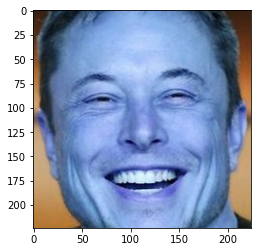

In [16]:
plt.imshow(elon_images[0])

In [17]:
r_images = []

for filename in os.listdir(ronaldinho+'/cropped'):
    img = cv2.imread(os.path.join(ronaldinho+'/cropped',filename))
    if img is not None:
        r_images.append(img)

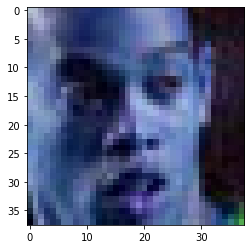

In [18]:
plt.imshow(r_images[0])

In [19]:
#os.mkdir('/Users/mac/Downloads/ML Project1/einstein/cropped')
einstein = '/Users/mac/Downloads/ML Project/einstein'
einstein_images = []
for filename in os.listdir(einstein+'/cropped'):
    img = cv2.imread(os.path.join(einstein+'/cropped',filename))
    if img is not None:
        einstein_images.append(img)

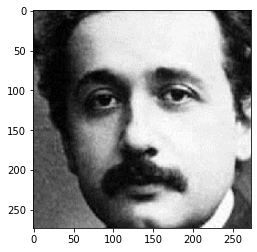

In [20]:
plt.imshow(einstein_images[0])

Now we have the list of images of all of the classes now lets label them

In [21]:
from itertools import repeat

e_list = []
for i in range(len(einstein_images)):
    e_list.extend(repeat('einstein',i))

In [22]:
def label_list(name, image_list):
    img_lst = []
    for i in range(len(image_list)):
        img_lst.extend(repeat(name,i))
    return img_lst

In [23]:
elon_list = label_list('Elon_Musk', elon_images)
einstein_list = label_list('Alber Einstein', einstein_images)
ronaldinho_list = label_list('Ronaldinho Gaucho', r_images)

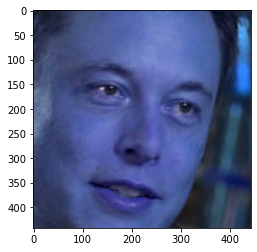

In [24]:
plt.imshow(elon_images[5])

# FEATURE ENGINEERING

Now we have the labels and the images stored in a list. Thus it is the time to do some feature engineering, thus we will do the wavelet transformation

In [25]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

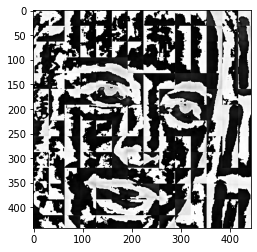

In [26]:
p_img = w2d(elon_images[5], 'db1', level=5)
plt.imshow(p_img, cmap='gray')

now we have the idea of wavelet transformation, thus we will apply this on all of the images inside the folder and vertically stack them in our datastructure.

In [27]:
d = '/Users/mac/Downloads/ML Project1/ronaldinho/cropped'
ronaldinho_cropped = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        ronaldinho_cropped.append(full_path)

        
elon_cropped = []
d2 = '/Users/mac/Downloads/ML Project1/elon musk/cropped'
for path in os.listdir(d2):
    full_path = os.path.join(d2, path)
    if os.path.isfile(full_path):
        elon_cropped.append(full_path)
        
        
        
einstein_cropped = []

d3 = '/Users/mac/Downloads/ML Project/einstein/cropped'
for path in os.listdir(d2):
    full_path = os.path.join(d2, path)
    if os.path.isfile(full_path):
        einstein_cropped.append(full_path)

        
        
        
einstein_cropped

['/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_1.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_12.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_13.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_0.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_2.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_11.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_10.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_3.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_7.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_28.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_14.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/.DS_Store',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_15.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_29.jpg',
 '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_6.jpg',
 '/

In [28]:
celebrity_file_names_dict= {
    'einstein' : einstein_cropped,
    'elon musk' : elon_cropped,
    'ronaldinho' : ronaldinho_cropped

}

celebrity_file_names_dict

{'einstein': ['/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_1.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_12.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_13.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_0.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_2.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_11.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_10.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_3.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_7.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_28.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_14.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/.DS_Store',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_15.jpg',
  '/Users/mac/Downloads/ML Project1/elon musk/cropped/elon_29.jpg',
  '/Users/mac/Downloads/ML Project1/elon mu

In [29]:
os.scandir('/Users/mac/Downloads/ML Project1/elon musk/cropped')

In [30]:
class_dict = {}
count = 0

for name in celebrity_file_names_dict.keys():
    class_dict[name] = count
    count += 1
class_dict

{'einstein': 0, 'elon musk': 1, 'ronaldinho': 2}

In [31]:
X, y = [], []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        
        if img is None:
            continue
            
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)  #wavelet transform
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        
        X.append(scalled_raw_img)
        y.append(class_dict[celebrity_name])
        
        
X_arr = np.array(X)
X_arr.shape

/opt/anaconda3/envs/CV/lib/python3.6/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


(141, 32, 32, 3)

In [32]:
import tensorflow as tf
from tensorflow.keras import models, layers



model = models.Sequential([
    layers.Conv2D(65, kernel_size=(2,2), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)), 
    
    
    layers.Conv2D(35, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_arr, y, test_size=0.2, random_state=20)

In [34]:
y_train = np.array(y_train)
y_test = np.array(y_test)
x1_test = np.float32(x_test)

In [35]:
model.fit(x_train, y_train, epochs=50)

Train on 112 samples
Epoch 1/50
112/112 [==============================] - 2s 14ms/sample - loss: 17.5538 - accuracy: 0.4018
Epoch 2/50
112/112 [==============================] - 1s 6ms/sample - loss: 2.3782 - accuracy: 0.4464
Epoch 3/50
112/112 [==============================] - 1s 6ms/sample - loss: 3.1444 - accuracy: 0.3214
Epoch 4/50
112/112 [==============================] - 1s 6ms/sample - loss: 1.5304 - accuracy: 0.6339
Epoch 5/50
112/112 [==============================] - 1s 6ms/sample - loss: 0.9792 - accuracy: 0.5982
Epoch 6/50
112/112 [==============================] - 1s 6ms/sample - loss: 0.8363 - accuracy: 0.5982
Epoch 7/50
112/112 [==============================] - 1s 6ms/sample - loss: 0.6371 - accuracy: 0.7054
Epoch 8/50
112/112 [==============================] - 1s 6ms/sample - loss: 0.5420 - accuracy: 0.7232
Epoch 9/50
112/112 [==============================] - 1s 6ms/sample - loss: 0.4622 - accuracy: 0.7232
Epoch 10/50
112/112 [==============================] - 1s 6

In [36]:
model.predict(x1_test)

array([[1.6265070e-05, 1.4722516e-05, 9.9996901e-01],
       [7.2544205e-01, 2.7235168e-01, 2.2062331e-03],
       [8.9680433e-01, 1.0295142e-01, 2.4423600e-04],
       [1.7835436e-02, 8.0834562e-03, 9.7408110e-01],
       [7.1141995e-02, 9.2826807e-01, 5.8998651e-04],
       [8.9477998e-01, 9.9567577e-02, 5.6524863e-03],
       [1.5850648e-01, 2.5776914e-01, 5.8372438e-01],
       [3.0823900e-16, 3.7516136e-14, 1.0000000e+00],
       [1.2500770e-04, 1.6123847e-04, 9.9971372e-01],
       [4.5285705e-02, 1.2242757e-02, 9.4247162e-01],
       [1.2900808e-20, 1.2046938e-16, 1.0000000e+00],
       [9.0006620e-01, 7.8306861e-02, 2.1626920e-02],
       [5.5017212e-04, 3.4539386e-05, 9.9941528e-01],
       [3.6539968e-02, 9.6294415e-01, 5.1585532e-04],
       [7.9492204e-02, 9.1928309e-01, 1.2247355e-03],
       [1.5231538e-05, 4.1486473e-06, 9.9998057e-01],
       [5.5784184e-01, 4.4191065e-01, 2.4746454e-04],
       [3.6715360e-06, 1.5612162e-05, 9.9998069e-01],
       [2.4579546e-01, 7.411

In [43]:
img_test = x1_test[4].reshape(1,32,32,3)
model.predict(img_test).argmax()

1

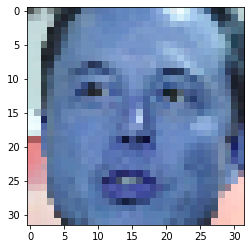

In [44]:
plt.imshow(x_test[4])